In [ ]:
#Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carregar os dados
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

In [ ]:
#Limpeza dos dados
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [ ]:
#Percentual de churn na base
df['Churn'].value_counts(normalize=True) * 100

In [ ]:
#Comparar fatura mensal média entre quem ficou e quem saiu
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Fatura Mensal x Churn')
plt.show()

In [ ]:
#Analisar o tempo de contrato
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Tipo de contrato x Churn')
plt.show()

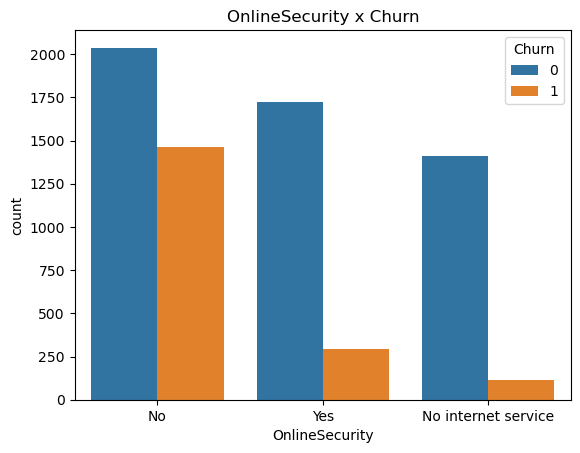

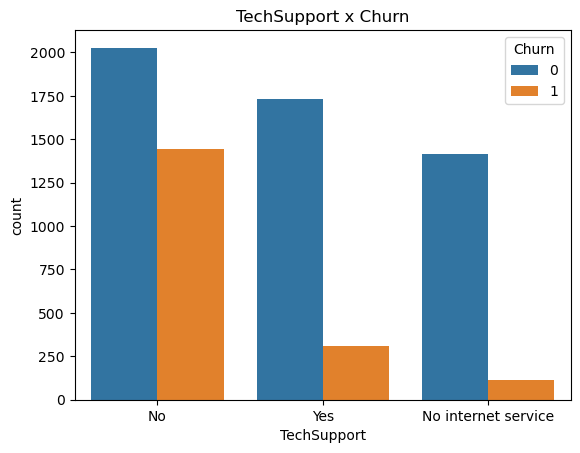

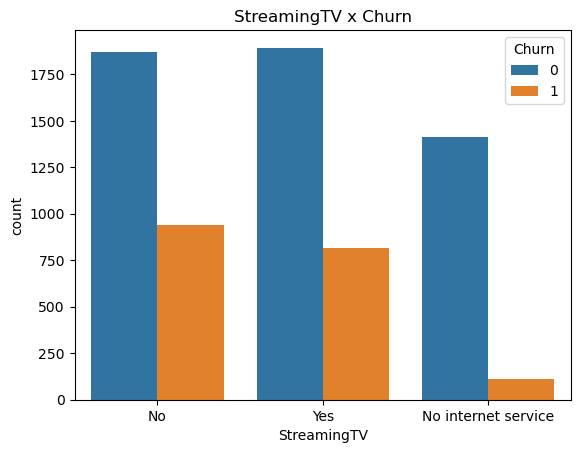

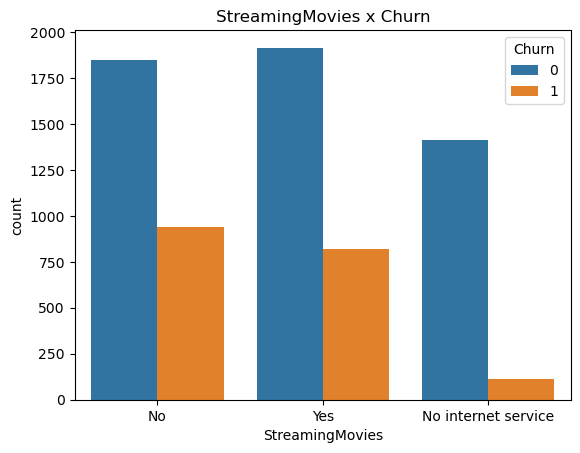

In [32]:
#Verificar quais serviços estão mais associados ao churn
servicos = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for servico in servicos:
    sns.countplot(data=df, x=servico, hue='Churn')
    plt.title(f'{servico} x Churn')
    plt.show()

### Insight 1: Cliente com contratos mensais possuem maior propensão a sair?

In [ ]:
#Analisar a distribuição de churn de acordo com o tipo de contrato dos clientes
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(['Ficaram', 'Churn'])
plt.show()

#Tabela percentual
churn_contract = df.groupby('Contract')['Churn'].mean().reset_index()
print(churn_contract * 100)

### Conclusão:
Percebe-se que clientes com **Contratos Mensais** apresentam uma taxa de Churn significativamente maior do que clientes com contratos anuais ou bianuais.

## Insight 2: Serviços extras ajudam a reter clientes?.

In [ ]:
#Analisar se quem possui suporte técnico ou segurança online tende a permanecer mais tempo na base
servicos = ['OnlineSecurity', 'TechSupport']

for servico in servicos:
    sns.countplot(data=df, x=servico, hue='Churn')
    plt.title(f'Churn x {servico}')
    plt.legend(['Ficaram', 'Churn'])
    plt.show()

### Conclusão:
Clientes que possuem **suporte técnico** ou **segurança online** parecem ter uma taxa de churn menor, sugerindo que esses serviços contribuem para a retenção.

## Insight 3: Fatura mensal alta impacta no churn?

In [ ]:
#Verificar se há relação entre o valor da fatura mensal e a saída dos clientessns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribuição da Fatura Mensal x Churn')
plt.xlabel('Churn')
plt.ylabel('Fatura Mensal')
plt.show()

### Conclusão:
Clientes que cancelaram tendem a ter **faturas médias mais altas** do que aqueles que permaneceram, o que pode indicar um problema de precificação ou percepção de valor


## 🎯 Sumário Executivo - Análise de Churn
### Objetivo do Projeto
O objetivo foi analisar o comportamento de churn (cancelamento) dos clientes de uma empresa de telecom, com foco em identificar os principais fatores que impactam na retenção ou perda dos clientes.

### Base de Dados
Dataset utilizado: Telco Customer Churn (fonte: Kaggle).

Tamanho: ~7.000 clientes.

Principais variáveis: Contrato, Serviços Extras, Fatura Mensal, Tempo de Cliente e Churn (Sim/Não).

### Recomendações
1. **Incentivar migração de clientes mensais para contratos anuais ou bianuais** com ofertas e benefícios (ex: descontos ou bônus).

2. **Oferecer pacotes de serviços extras** como segurança online e suporte técnico, inclusive como promoções para clientes com maior risco de churn.

3. **Reavaliar a política de preços**, principalmente para clientes com fatura alta e poucos serviços agregados, ou personalizar planos para diferentes perfis de clientes.

### 🎯 Mini Modelo Preditivo - Regressão Logística

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Seleção de variáveis para o modelo
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Converter TotalCharges para numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

X = df[features]
y = df['Churn']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [87]:
# Treinando o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1549
           1       0.61      0.42      0.50       561

    accuracy                           0.77      2110
   macro avg       0.71      0.66      0.68      2110
weighted avg       0.76      0.77      0.76      2110



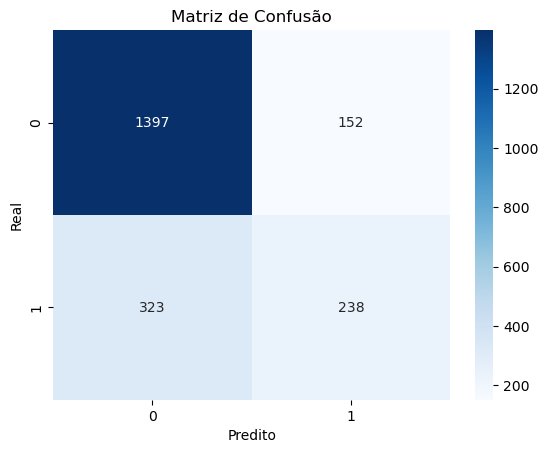

In [89]:
# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

## 🎯 Conclusão Final

## Conclusão Modelo Preditivo

Criamos um modelo de regressão logística simples capaz de identificar clientes com maior risco de churn, com métricas de avaliação satisfatórias para uma primeira versão.